In [1]:
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html 
import plotly.express as px
import pandas as pd
from datetime import date
from dash.dependencies import Input, Output, State
from dash.dependencies import MATCH

In [1]:
gapminder = px.data.gapminder()
fig = px.scatter(gapminder, x='gdpPercap', y='lifeExp', size='pop', color='continent',
                size_max=70, log_x=True, log_y=True, range_y=[20, 90], animation_frame='year')
fig.show()

NameError: name 'px' is not defined

In [19]:
csv_url = 'https://www.customs.go.jp/toukei/shinbun/trade-st/timeseries_202003.csv'

In [20]:
df = pd.read_csv(csv_url, index_col=0, encoding='shift-jis')
df.head()

,Unnamed: 1,Unnamed: 2
《季節調整値》 （単位：百万円）,,
Seasonally adjusted data (a million yen),NaN,NaN
Years/Months,Exp-Total,Imp-Total
NaN,NaN,NaN
2010/04,5624812,5045774
2010/05,5644861,5167155


In [21]:
df.to_csv('data/boueki.csv')

In [22]:
df = pd.read_csv('data/boueki.csv')

In [23]:
excel_url = 'https://www.mof.go.jp/budget/reference/statistics/01.xls'
excel = pd.ExcelFile(excel_url)
print(excel.sheet_names)
print(len(excel.sheet_names))

WARNING *** file size (193488) not 512 + multiple of sector size (512)
['1.-1明治・大正', '1.-2昭和元～21年度', '1.-3昭和22～63年度', '1.-4平成', '1.-5令和']
5


In [24]:
df = pd.ExcelFile.parse(excel, sheet_name=excel.sheet_names[3], index_col=0)


In [25]:
df.to_excel('data/zaimu.xls')

<ipython-input-25-e30532d55403>:1: FutureWarning:

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.



In [26]:
df = pd.read_excel('data/zaimu.xls', index_col=0)
df.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,（単位：千円）
年度,区 分,歳 入,NaN,歳 出,NaN,備 考,備 考
NaN,NaN,予 算 額,決 算 額,予 算 額,決 算 額,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
平成,暫定予算,NaN,NaN,NaN,NaN,NaN,NaN
元年度,第114国会,2843097334,NaN,9224545254,NaN,NaN,4月1日～5月20日分


In [27]:
html_url = 'http://www.kantei.go.jp/jp/singi/keizaisaisei/miraitoshikaigi/suishinkaigo2018/'
df = pd.read_html(html_url)[5]
df.head()

,回数,開催日,議題・会議資料関係
0,第6回,令和元年11月25日,組織の変革とオープンイノベーションの推進―内部の経営資源の新たな分野への投資の促進に向けて―
1,第6回,令和元年11月25日,議事次第 配布資料 議事要旨
2,第5回,令和元年10月31日,組織の変革とオープンイノベーションの推進―内部の経営資源の新たな分野への投資の促進に向けて―
3,第5回,令和元年10月31日,議事次第 配布資料 議事要旨
4,第4回,平成31年4月5日,産学融合によるイノベーションの創出について


In [32]:
df = pd.read_csv('data/h-mon-a.csv', encoding='shift-jis')
df.shape

(188, 261)

In [34]:
year_data = df.loc[0].dropna()
year_data_list = [int(year.replace('年', '')) for year in list(year_data)]
end_month = df.iloc[2, -1]
end_month = int(end_month.replace('月', ''))
print(year_data_list)
print(end_month)

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
3


In [36]:
month_count = (len(year_data_list)-1)*12 + end_month
date_list = pd.date_range('2000',periods=month_count,freq='M')

In [37]:
kakei_data = df.iloc[3:,5]

In [39]:
kakei_data.head()

3    世帯数分布(抽出率調整)
4           集計世帯数
5         世帯人員(人)
6      18歳未満人員(人)
7      65歳以上人員(人)
Name: Unnamed: 5, dtype: object

In [40]:
kakei_data =df.iloc[3:,5:]
kakei_data = kakei_data.set_index('Unnamed: 5') 
kakei_data.columns = date_list
kakei_data.index.name=''
kakei_data=kakei_data.T
kakei_data['date']=kakei_data.index
kakei_data=kakei_data.reset_index(drop=True)
kakei_data

,世帯数分布(抽出率調整),集計世帯数,世帯人員(人),18歳未満人員(人),65歳以上人員(人),うち無職者人員(人),有業人員(人),世帯主の年齢(歳),持家率(％),家賃・地代を支払っている世帯の割合(％),...,聴視・観覧,旅行,スポーツ,月謝,会費・つきあい費,その他の教養娯楽,消費支出(再掲),基礎的支出,選択的支出,date
0,10000,7887,3.32,0.74,0.52,0.41,1.51,52.4,76,22.1,...,2049,8876,3001,3241,1561,7063,309621,184372,125248,2000-01-31
1,10000,7942,3.32,0.75,0.53,0.41,1.51,52.6,76.3,22,...,2199,9058,2200,3329,1441,6370,290663,170045,120618,2000-02-29
2,10000,7934,3.32,0.75,0.53,0.41,1.51,52.7,76.2,22.6,...,1977,12249,3022,3497,1495,8068,335341,186202,149139,2000-03-31
3,10000,7922,3.32,0.75,0.52,0.41,1.52,52.6,75.8,22.2,...,2470,10432,3129,3768,1888,8109,335276,173441,161835,2000-04-30
4,10000,7928,3.31,0.75,0.52,0.41,1.53,52.7,76.1,22.6,...,2202,11746,2946,3256,1683,8822,308566,177153,131413,2000-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,10000,7506,2.94,0.53,0.86,0.68,1.35,60.1,85,13.8,...,2449,4314,2706,2189,688,9236,278718,161387,117331,2020-11-30
251,10000,7540,2.95,0.53,0.85,0.68,1.35,60.1,85.1,13.9,...,3208,2354,2673,2209,771,12162,315007,197999,117009,2020-12-31
252,10000,7485,2.94,0.53,0.86,0.68,1.35,60.3,85.5,13.5,...,2294,1719,2176,1881,682,8031,267760,166806,100955,2021-01-31
253,10000,7485,2.94,0.53,0.86,0.68,1.34,60.3,84.8,13.1,...,2770,1686,2023,1721,516,7794,252451,152554,99897,2021-02-28


In [41]:
kakei_data.to_csv('data/kakei_data.csv')

In [42]:
pd.set_option('max_columns',60)
csv_url = 'https://dl.dropboxusercontent.com/s/6mztoeb6xf78g5w/COVID-19.csv'
df = pd.read_csv(csv_url, low_memory=False)
print(df.shape)
print(df.info())

(133174, 54)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133174 entries, 0 to 133173
Data columns (total 54 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   通し                133174 non-null  int64  
 1   厚労省NO             3694 non-null    object 
 2   無症状病原体保有者         921 non-null     object 
 3   国内                302 non-null     object 
 4   チャーター便            11 non-null      object 
 5   年代                133173 non-null  object 
 6   性別                133171 non-null  object 
 7   確定日               133174 non-null  object 
 8   発症日               57672 non-null   object 
 9   受診都道府県            133174 non-null  object 
 10  居住都道府県            133162 non-null  object 
 11  居住管内              1609 non-null    object 
 12  居住市区町村            80763 non-null   object 
 13  キー                133166 non-null  object 
 14  発表                132681 non-null  object 
 15  都道府県内症例番号         128101 non-null  object 
 16  市町村内症例番

In [43]:
selected_cols = ['年代', '性別', '確定日', '発症日', '居住都道府県', 'X', 'Y']
df1 = df[selected_cols]
df1.head()

,年代,性別,確定日,発症日,居住都道府県,X,Y
0,30,男性,1/15/2020,1/3/2020,神奈川県,139.642347,35.447504
1,40,男性,1/24/2020,1/14/2020,中華人民共和国,116.409685,39.903832
2,30,女性,1/25/2020,1/21/2020,中華人民共和国,116.409685,39.903832
3,40,男性,1/26/2020,1/23/2020,中華人民共和国,116.409685,39.903832
4,40,男性,1/28/2020,1/22/2020,中華人民共和国,116.409685,39.903832


In [53]:
df1 = df1.dropna(how='all')
df1.tail()

,年代,性別,確定日,発症日,居住都道府県,X,Y,count
133169,30,男性,11/30/2020,NaN,長野県,138.412868,36.744750,1
133170,70,女性,11/30/2020,11/29/2020,長野県,138.440643,36.922904,1
133171,70,女性,11/30/2020,11/25/2020,長野県,137.851094,36.503017,1
133172,50,男性,11/30/2020,11/30/2020,長野県,137.851094,36.503017,1
133173,60,女性,11/30/2020,11/23/2020,長野県,138.114709,36.530777,1


In [45]:
df1['count'] = 1
df1

,年代,性別,確定日,発症日,居住都道府県,X,Y,count
0,30,男性,1/15/2020,1/3/2020,神奈川県,139.642347,35.447504,1
1,40,男性,1/24/2020,1/14/2020,中華人民共和国,116.409685,39.903832,1
2,30,女性,1/25/2020,1/21/2020,中華人民共和国,116.409685,39.903832,1
3,40,男性,1/26/2020,1/23/2020,中華人民共和国,116.409685,39.903832,1
4,40,男性,1/28/2020,1/22/2020,中華人民共和国,116.409685,39.903832,1
...,...,...,...,...,...,...,...,...
133169,30,男性,11/30/2020,NaN,長野県,138.412868,36.744750,1
133170,70,女性,11/30/2020,11/29/2020,長野県,138.440643,36.922904,1
133171,70,女性,11/30/2020,11/25/2020,長野県,137.851094,36.503017,1
133172,50,男性,11/30/2020,11/30/2020,長野県,137.851094,36.503017,1


In [48]:
for col in df1.columns:
    print(f'{col}:{df1[col].unique()}')

年代:['30 ' '40 ' '60 ' '50 ' '20 ' '80 ' '70 ' '10 ' '0-10' '不明' '90 ' '20'
 '50' '30' '40' '80' '10' '60' '70' nan '不明\u3000' '90\xa0' '60\xa0' '90'
 '10\xa0' '0-10\xa0' '30\xa0' '50\xa0' '40\xa0' '100 ' '20\xa0']
性別:['男性' '女性' '不明' '男性\u3000' nan '⼥性' '女性\xa0' '非公表' '男性\xa0' ' 女性' '女|生']
確定日:['1/15/2020' '1/24/2020' '1/25/2020' '1/26/2020' '1/28/2020' '1/29/2020'
 '1/30/2020' '1/31/2020' '2/1/2020' '2/4/2020' '2/5/2020' '2/7/2020'
 '2/10/2020' '2/11/2020' '2/13/2020' '2/14/2020' '2/15/2020' '2/16/2020'
 '2/17/2020' '2/18/2020' '2/19/2020' '2/20/2020' '2/21/2020' '2/22/2020'
 '2/23/2020' '2/24/2020' '2/25/2020' '2/26/2020' '2/27/2020' '2/28/2020'
 '2/29/2020' '3/1/2020' '3/2/2020' '3/3/2020' '3/4/2020' '3/5/2020'
 '3/6/2020' '3/7/2020' '3/8/2020' '3/9/2020' '3/10/2020' '3/11/2020'
 '3/12/2020' '3/13/2020' '3/14/2020' '3/15/2020' '3/16/2020' '3/17/2020'
 '3/18/2020' '3/19/2020' '3/20/2020' '3/21/2020' '3/22/2020' '3/23/2020'
 '3/24/2020' '3/25/2020' '3/26/2020' '3/27/2020' '3/28/2020' '

In [49]:
df1['年代'].astype('str').apply(lambda x:x.replace('o-10','1'))

0         30 
1         40 
2         30 
3         40 
4         40 
         ... 
133169     30
133170     70
133171     70
133172     50
133173     60
Name: 年代, Length: 133174, dtype: object

In [56]:
df1['年代'] = df1['年代'].apply(lambda x: x.replace('不明', '50'))
df1['年代'] = df1['年代'].apply(lambda x: x.replace('nan', '50'))
df1['年代'] = df1['年代'].apply(lambda x: int(x))
df1['年代'].unique()

AttributeError: 'float' object has no attribute 'replace'

In [57]:
df1.to_csv('data/covid_19_update.csv')

In [58]:

pd.set_option('max_columns', 100)
pd.set_option('max_rows', 100)

excel_url = 'https://www.mof.go.jp/budget/reference/statistics/24.xls'
df = pd.read_excel(excel_url)
print(df.shape)
print(df.info())

WARNING *** file size (44668) not 512 + multiple of sector size (512)
(57, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   17 non-null     object 
 1   Unnamed: 1   37 non-null     object 
 2   Unnamed: 2   37 non-null     object 
 3   Unnamed: 3   0 non-null      float64
 4   Unnamed: 4   53 non-null     object 
 5   Unnamed: 5   53 non-null     object 
 6   Unnamed: 6   53 non-null     object 
 7   Unnamed: 7   53 non-null     object 
 8   Unnamed: 8   53 non-null     object 
 9   Unnamed: 9   53 non-null     object 
 10  Unnamed: 10  53 non-null     object 
 11  Unnamed: 11  53 non-null     object 
 12  Unnamed: 12  53 non-null     object 
 13  Unnamed: 13  53 non-null     object 
 14  Unnamed: 14  53 non-null     object 
 15  Unnamed: 15  53 non-null     object 
 16  Unnamed: 16  53 non-null     object 
 17  Unnamed: 17  53

In [60]:
df1 = df.iloc[5:56, :]
df1 = df1.drop(['Unnamed: 1', 'Unnamed: 3'], axis=1)
df1 = df1.reset_index(drop=True)
df1.columns = [f'col_{i}' for i in range(len(df1.columns))]

In [61]:
print(df1.iloc[46, 4:].unique())
print(df1.iloc[47, 4:].unique())
print(df1.iloc[48, 4:].unique())
print(df1.iloc[49, 4:].unique())

['-' 'ー' '－']
['-' 'ー' '－']
['-' 'ー' '－']
['-' 'ー' '－']


In [62]:
replace_strs = df1.iloc[46, 4:].unique()
df1 = df1.replace(replace_strs, 0)

In [63]:
df1['main_title']=df1['col_0'].fillna(method='ffill')

In [64]:
df1.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,main_title
0,１．国 家 機 関 費,NaN,4089878933,4280839099,4273674613,4802768587,4845892598,4308629662,4382520701,4464313211,4460200856,4361194867,4530742429,4470410404,5074090225,4945147236,4928503182,4369555684,4867349264,4860631635,5061873526,4979956434,4825663205,4807859792,１．国 家 機 関 費
1,NaN,皇室費,6686157,6643501,6832632,9366209,7408714,7089358,6721568,6965778,6849417,6591482,6569224,6613183,6137774,5491398,6026580,5965628,5774431,6151561,5800414,5351842,6776077,9678519,１．国 家 機 関 費
2,NaN,国会費,123019403,131142130,138585747,146463865,154158813,133486528,127362960,127144108,123122693,122817737,122136741,122660956,126258243,151426912,135321370,128495174,125668672,132043907,134301666,132560410,133287519,136393763,１．国 家 機 関 費
3,NaN,選挙費,3534438,57491037,3258220,73263020,63135863,5853557,71775157,61379786,69799237,1328890,59141967,702891,68788324,52100534,319976,59452810,50432786,56412418,1643113,53738213,59832965,143469,１．国 家 機 関 費
4,NaN,司法、警察及び消防費,1319365876,1399227861,1408610493,1453162305,1410079489,1386978225,1390638515,1384424712,1411240550,1431981688,1468295392,1496556058,1533909368,1472709759,1597209034,1480602910,1524285156,1502880959,1514804508,1573470081,1560110218,1629272958,１．国 家 機 関 費


In [65]:
col0_has_value = df1['col_0'].dropna()
df_big = df1.iloc[col0_has_value.keys(), :].dropna(1)
col_data = [year for year in range(1997, 2019)]
col_data.insert(0, 'title')
col_data.insert(len(col_data), 'main_title')
df_big.columns = col_data
df_big = df_big.reset_index(drop=True)

In [66]:
col0_has_value

0            １．国 家 機 関 費
9            ２．地 方 財 政 費
13           ３．防 衛 関 係 費
14           ４．国土保全及び開発費
20           ５．産 業 経 済 費
26           ６．教 育 文 化 費
31             ７．社会保障関係費
41             ８．恩　　給　　費
45             ９．国　　債　　費
46    10.経済危機対応・地域活性化予備費
47     11.東日本大震災復旧・復興予備費
48         12.熊本地震復旧等予備費
49            12．予　　備　　費
50            13．そ　　の　　他
Name: col_0, dtype: object

In [67]:

col1_has_value = df1['col_1'].dropna()
df_detail = df1.iloc[col1_has_value.keys(), :].dropna(1)
df_detail.columns = col_data
df_add = df_big.iloc[[2, 8, 9, 10, 11, 12, 13], :]
df_detail = pd.concat([df_detail, df_add])
df_detail = df_detail.reset_index(drop=True)

In [71]:
df_detail.to_csv('data/zaisei_detail.csv')

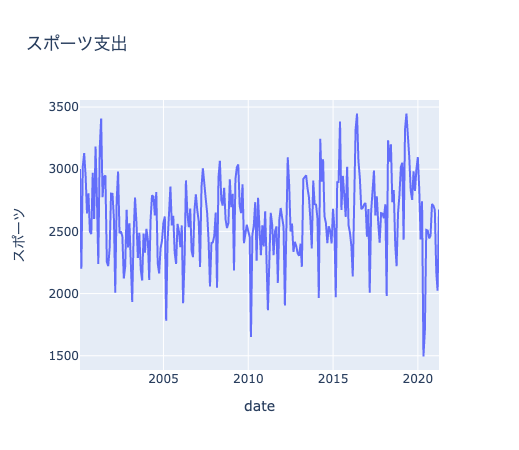

In [75]:
df = pd.read_csv('data/kakei_data.csv', index_col=0, parse_dates=['date'])
fig = px.line(df,x='date', y='スポーツ', title='スポーツ支出')
fig.show()

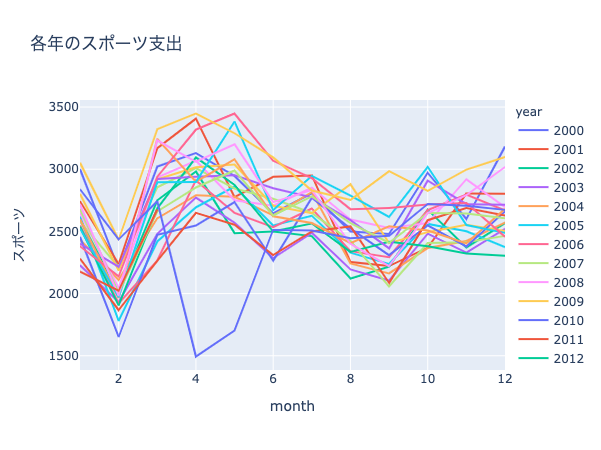

In [78]:
df['year']=df['date'].map(lambda x: x.year)
df['month']=df['date'].map(lambda x: x.month)
fig = px.line(df, x='month',y='スポーツ', color='year', title='各年のスポーツ支出')
fig.show()

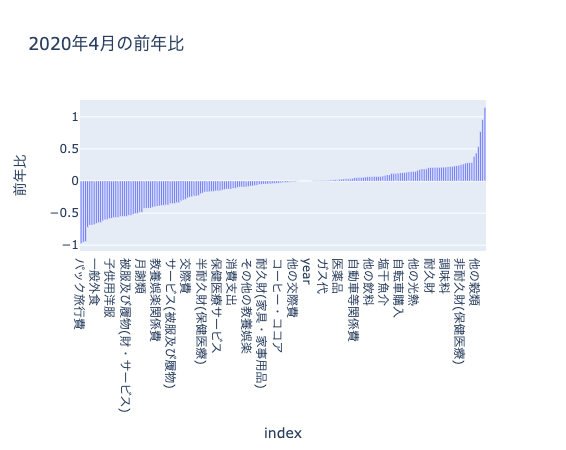

In [83]:
df_yoy = df.copy()
df_yoy.index = df_yoy['date']
df_yoy = df_yoy.loc[:, ~df_yoy.columns.isin(['date'])]
df_yoy = df_yoy.pct_change(12)
df_yoy2004 = df_yoy.loc['2020-4'].T.sort_values(by='20200430')
df_yoy2004.columns = ['前年比']
fig = px.bar(df_yoy2004, x=df_yoy2004.index, y='前年比', title='2020年4月の前年比', width=1000)
fig.show()

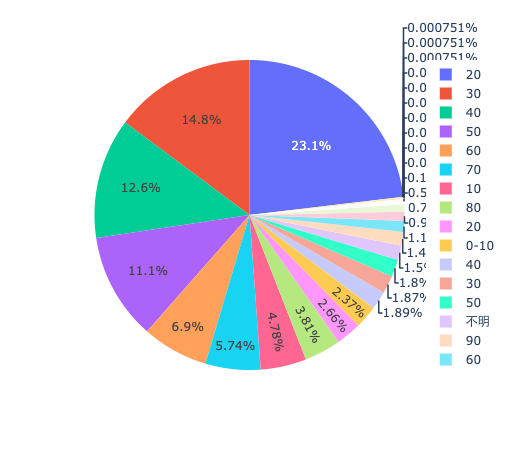

In [85]:
covid = pd.read_csv('data/covid_19_update.csv', index_col=0, parse_dates=['確定日', '発症日'])
covid_age =covid.groupby('年代', as_index=False).count()
px.pie(covid_age, names='年代', values='count')

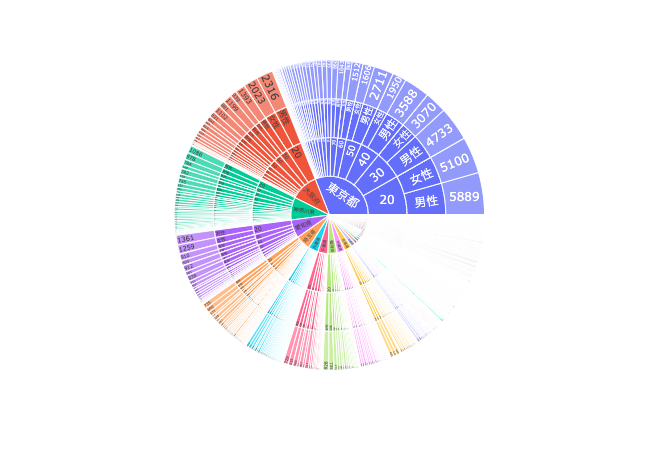

In [89]:
covid_data =covid.groupby(['居住都道府県', '年代', '性別'], as_index=False).count()
fig = px.sunburst(covid_data, path=['居住都道府県', '年代', '性別', 'count'], values='count')
fig.show()

In [90]:
zaisei = pd.read_csv('data/zaisei_detail.csv', index_col=0)

In [91]:
zaisei_melt = zaisei.melt(id_vars=['title', 'main_title'])

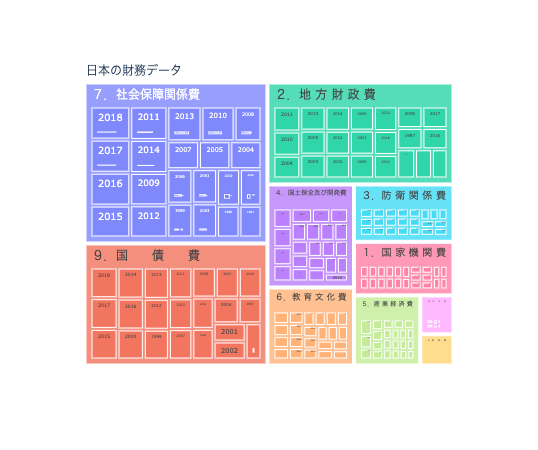

In [93]:
zaisei_melt['board'] = '日本の財務データ'
px.treemap(zaisei_melt, path=['board', 'main_title', 'variable', 'title'], values='value')

In [95]:
app = JupyterDash(__name__)
app.layout = html.H1('HELOO WEB+DB PRESS')
app.run_server(mode='inline')

In [97]:
app = JupyterDash(__name__)
app.layout = html.Div([
    html.P('Show Image', style={'backgroundColor': 'red', 'color': 'white'}),
    html.Img(src='assets/kyoto2.png')
])
app.run_server(mode='inline')

/Users/m.nomura/venv/lib/python3.9/site-packages/jupyter_dash/jupyter_app.py:139: UserWarning:

The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.



In [98]:
df = pd.read_csv('data/kakei_data.csv',
                index_col=0, parse_dates=['date'])
app= JupyterDash(__name__)
app.layout = html.Div([
    html.H1('Graphコンポーネントの利用'),
    dcc.Graph(
    figure=px.line(df, x='date', y='スポーツ', title='スポーツ支出')
    )
])
app.run_server(mode='inline')

In [101]:
app = JupyterDash(__name__)
app.layout = dcc.Markdown('''
    # Markdoenを使います
    ## Dash Componets
    ### dash html components
    -htmlタグを提供します
    ### dash core components
    - 様々なツールを提供します
    ''', style={'color': 'green', 'background':'black', 'padding': '2%'
}
)
app.run_server(mode='inline')

In [107]:
app = JupyterDash(__name__)
four_styles = {'margin': '3%',
              'width': '40%',
              'display': 'inline-block',
              'verticalAlign':'top'}
selection =['tokyo', 'oaska', 'fukuoka']
app.layout = html.Div([
    html.Div([
     dcc.Dropdown(options=[{'values': i, 'label':i}
                          for i in selection],
                    value='tokyo')], style=four_styles),
    html.Div([
        dcc.Input(placeholder='文字を入力してください'),
    ], style=four_styles),
    html.Div([
        dcc.DatePickerRange(start_date=date(2017, 12, 18),
                           end_date=date(2020, 6, 22),),
    ],style=four_styles),
    html.Div([
        html.Button('Hello Push Me')
    ], style =four_styles)
])
app.run_server(mode='inline')

In [112]:
app = JupyterDash(__name__)

graph_type_list = [px.line, px.scatter, px.bar]

app.layout = html.Div([
    dcc.Dropdown(
        id = 'my_dropdown',
        options = [{'label': type_.__name__, 'value': num} for num, type_ in enumerate(graph_type_list)],
        value = 0
    ),
    html.Button(
        id='my_button',
        children='Update Graph'
    ),
    dcc.Graph(
        id='my_graph',
    ),
])

@app.callback(Output('my_graph', 'figure'),
             [Input('my_button', 'n_clicks')],
            [State('my_dropdown', 'value')]
            )
def update_graph(n_clicks, selected_value):
    return graph_type_list[selected_value](x=[1,2,3,4,5], y=[1,2,3,4,5])

app.run_server(mode='inline')

In [3]:
df = pd.read_csv('data/kakei_data.csv', index_col=0, parse_dates=['date'])
df.iloc[:, :-1] = df.iloc[:, :-1].astype('float')

app = JupyterDash(__name__)

app.layout = html.Div([    
    html.Button(id='my_button', children='PUSH ME'),
    html.Div(id='my_div', children=[])
])


@app.callback(Output('my_div', 'children'),
            [Input('my_button', 'n_clicks')],
            [State('my_div', 'children')],
            prevent_initial_call=True)
def add_components(n_clicks, children):
    new_components = html.Div([
        dcc.Dropdown(id={'type': 'graph_dropdown',
                        'index': n_clicks
                        },
                    options = [{'label': c, 'value': c} for c in list(df.columns[:-1])],
                    value = [df.columns[:-1][n_clicks]],
                    multi=True
                    ),
        dcc.Graph(id={'type':'my_graph', 'index': n_clicks})
    ])
    children.append(new_components)
    return children

@app.callback(Output({'type': 'my_graph', 'index': MATCH}, 'figure'),
            [Input({'type': 'graph_dropdown', 'index': MATCH}, 'value')])
def update_graph(selected_value):
    return px.line(df, x='date', y=selected_value)

app.run_server(mode='inline')

In [3]:
python app.py

SyntaxError: invalid syntax (<ipython-input-3-b851947b46d7>, line 1)